In [2]:
## Load Library
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import random
import math

# Algorithm Implementation

## - K-Means Clustering Algorithm

In [3]:
# K-Means Implemetation
### n_clusters : The number of clusters to form as well as the number of centroids to generate
### tol : Tolerance to declare convergence
### max_iter : Maximum number of iterations of the k-means algorithm for a single run
class KMeans():
    cluster_centers_ = None
    labels_ = None
    
    def __init__(self, n_clusters=8, tol=0.01, max_iter=300):
        self.n_clusters = n_clusters
        self.tol = tol
        self.max_iter = max_iter
    
    def chooseCenters(self, X):
        """ Choose random k-cluster centers
        Example
        Input : [[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0]]
        Output : [[1.0, 1.0], [4.0, 4.0]] # if n_clusters is 2
        """
        return random.sample(X, self.n_clusters)
    
    def calculateDistance(self, data, center):
        """ Calculate distance between a data and a cluster center using euclidean formula
        Example
        Input : data = [2.0, 3.0], center = [10.0, 8.0]
        Output : ((2.0-10.0)^2 + (3.0-8.0)^2)^1/2
        """
        jarak = 0
        for i in range(len(data)) :
            jarak += math.pow(center[i] - data[i], 2)
        return math.sqrt(jarak)
        
    def updateCenters(self, X):
        """ Update all cluster centers using mean of the data in the cluster
        Example
        Input : X = [[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0]], labels = [0, 0, 1, 1]
        Output : [[1.5, 1.5], [3.5, 3.5]]
        """
        dictionary = [{"Cluster" : i, "Count" : 0} for i in range(self.n_clusters)]
        for i in range(self.n_clusters) :
            for j in range(len(X[i])) :
                key = "Sum" + str(j)
                dictionary[i][key] = 0

        for i in range(len(self.labels_)) :
            for j in range(len(X[i])) :
                key = "Sum" + str(j)
                dictionary[labels_[i]][key] += X[i][j]
            dictionary[labels_[i]]["Count"] += 1

        updated = [[0 for j in range(len(X[0]))] for i in range(self.n_clusters)]
        i = 0
        for data in dictionary :
            for j in range(len(X[i])) :
                updated[i][j] = data["Sum" + str(j)] / data["Count"]
            i += 1

        return updated
        
    def calculateError(self, X):
        """ Update all cluster centers using mean of the data in the cluster
        Example
        Input : X = [[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0]], centers = [[1.5, 1.5], [3.5, 3.5]]
        Output : Total euclidean distance between all data and its cluster centers
        """
        error = 0.0
        for i in range(len(X)) :
            temp = 0.0
            for j in range(len(X[i])) :
                temp += math.pow(X[i][j] - updated[labels_[i]][j], 2)
            error += math.sqrt(temp)
            
        return error
        
    def fit(self, X):
        self.cluster_centers_ = np.zeros((self.n_clusters, X.shape[1]))
        self.labels_ = np.zeros(X.shape[0])
        
        # Choose random k-cluster centers
        self.cluster_centers_ = self.chooseCenters(X)
        
        # Clustering Part
        run = True
        while (run):
            # Iterate the data to clustering
            for idx_data in range(0, len(X)):
                best_distance = 99999999
                cluster_choosen = -1

                # Calucalate the distance from data to all cluster centers
                for idx_center in range(0, len(self.cluster_centers_)):
                    distance = self.calculateDistance(X[idx_data], self.cluster_centers_[idx_center])
                    if (distance < best_distance):
                        best_distance = distance
                        cluster_choosen = idx_center

                # Put data to nearest cluster
                if (cluster_choosen != -1):
                    self.labels_[idx_data] = cluster_choosen

            # Update all cluster centers
            updated_cluster_centers_ = self.updateCenters(X)

            # Calculate error
            error = self.calculateError(X)
            
            # Check terimate condition
            if (np.array_equal(updated_cluster_centers_,self.cluster_centers_) or error <= 0.05):
                run = False
                
            # Change current cluster centers with updated cluster centers
            self.cluster_centers_ = updated_cluster_centers_
            
        return self

## - Agglomerative Clustering Algorithm

In [154]:
### Agglomerative
### n_clusters : The number of clusters to form
### linkage : Which linkage criterion to use. value : "single", "complete", "avg", "avg_group"
class Agglomerative():
    labels_ = None
    
    def __init__(self, linkage="single", n_clusters=4):
        self.linkage = linkage
        self.n_clusters = n_clusters
    
    def calculateCentroid(self, cluster):
        cent = np.array([0.0,0.0,0.0,0.0])
        for point in cluster:
            cent += point
        return cent/len(cluster)
        
    def averageGroup(self, cluster1, cluster2):
        cent1 = self.calculateCentroid(cluster1)
        cent2 = self.calculateCentroid(cluster2)
        
        return math.sqrt((cent1[0]-cent2[0])**2+(cent1[1]-cent2[1])**2+(cent1[2]-cent2[2])**2+(cent1[3]-cent2[3])**2)
    
    def fit(self, X):
        self.labels_ = np.zeros(X.shape[0])
        clusters = []
        # Debug tool
        deb = []
        for i in range(0,150):
            deb.append([i])
            clusters.append([X[i].tolist()])
            
        # Clustering until desired amount of cluster
        while (len(clusters) > self.n_clusters):
            # Searching for the minimum proximity
            # Minid --> row and column of the minimum link
            # Minva --> the value of the minimum link
            minid = [0,1];
            minva = self.averageGroup(clusters[0], clusters[1])
            for i in range(0,len(clusters)):
                for j in range(i+1, len(clusters)):
                    tmp = self.averageGroup(clusters[i], clusters[j])
                    if (tmp < minva):
                        minid = [i,j]
                        minva = tmp
            
            # Joining two clusters

            clusters[minid[0]] = clusters[minid[0]] + clusters.pop(minid[1])
            deb[minid[0]] = deb[minid[0]] + deb.pop(minid[1])
        
        # Labelling clusters data
        label = 0
        for cluster in deb:
            for point in cluster:
                self.labels_[point] = label
            label += 1
        return self

# Algorithm Testing

In [32]:
## Load data
data = load_iris()

In [35]:
## Extract data 
X_data = np.array(data['data'])
Y_data = np.array(data['target'])

In [156]:
## Clustering data
# K-Means Clustering
#kmeans = KMeans().fit(X_data)

# Agglomerative Clustering
agg = Agglomerative().fit(X_data)
print(agg.labels_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 2. 1. 3. 1. 3. 3. 3. 3. 1. 3. 3. 3. 3. 3. 3. 1. 1. 3. 3. 3. 3. 1.
 3. 1. 3. 1. 3. 3. 1. 1. 3. 3. 3. 3. 3. 1. 3. 3. 3. 3. 1. 3. 3. 3. 1. 3.
 3. 3. 1. 3. 3. 1.]


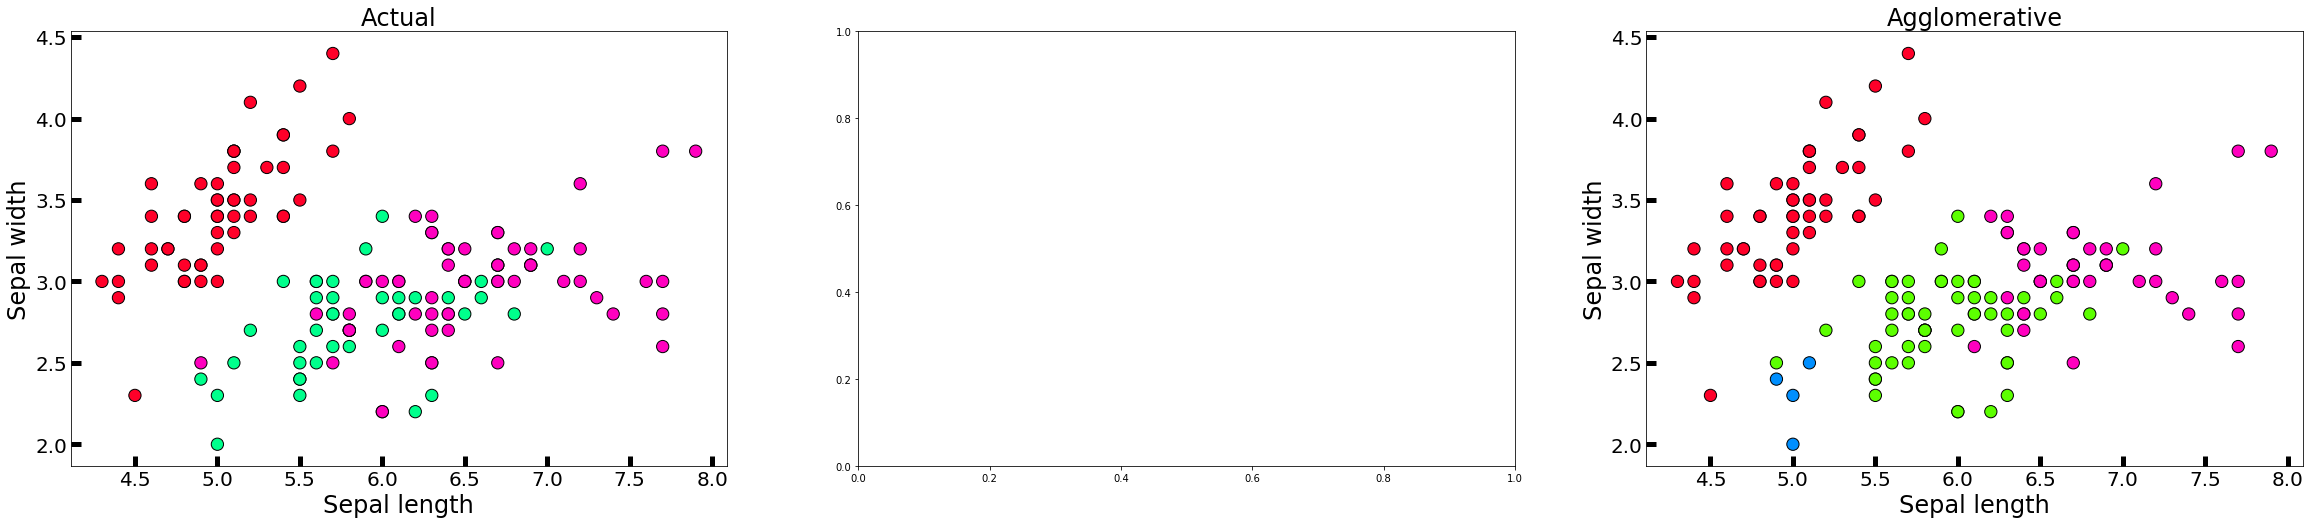

In [157]:
## Visualize data
fig, axes = plt.subplots(1, 3, figsize=(40,8))

# Actual Data
axes[0].scatter(X_data[:, 0], X_data[:, 1], c=Y_data, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=24)
axes[0].set_ylabel('Sepal width', fontsize=24)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=24)

# Predicted K-Means
# axes[1].scatter(X_data[:, 0], X_data[:, 1], c=kmeans.labels_, cmap='gist_rainbow',
# edgecolor='k', s=150)
# axes[1].set_xlabel('Sepal length', fontsize=24)
# axes[1].set_ylabel('Sepal width', fontsize=24)
# axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
# axes[1].set_title('K-Means', fontsize=24)

# Predicted Agglomerative
axes[2].scatter(X_data[:, 0], X_data[:, 1], c=agg.labels_, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[2].set_xlabel('Sepal length', fontsize=24)
axes[2].set_ylabel('Sepal width', fontsize=24)
axes[2].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[2].set_title('Agglomerative', fontsize=24)

plt.show()